Short desription of the competition in bullet points:<br>
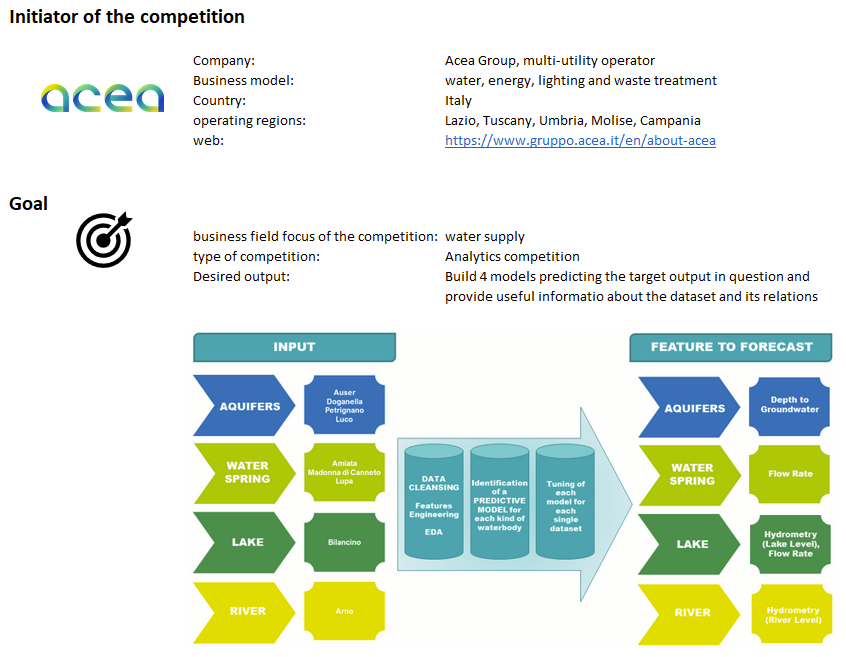

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import missingno as msno

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/gps-coords-aq/gps_coords.xlsx
/kaggle/input/acea-water-prediction/Aquifer_Doganella.csv
/kaggle/input/acea-water-prediction/Aquifer_Auser.csv
/kaggle/input/acea-water-prediction/Water_Spring_Amiata.csv
/kaggle/input/acea-water-prediction/datasets_description.ods
/kaggle/input/acea-water-prediction/Lake_Bilancino.csv
/kaggle/input/acea-water-prediction/datasets_description.xlsx
/kaggle/input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv
/kaggle/input/acea-water-prediction/Aquifer_Luco.csv
/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv
/kaggle/input/acea-water-prediction/Water_Spring_Lupa.csv
/kaggle/input/acea-water-prediction/River_Arno.csv


# Aquifers

In short and non-scientific words: An aquifer could be described as a cluster of waterpermable rock layers saturated by (high quantities of) water and can be seen as a kind of water underground water reservoirs. The water can be accessed by wells and is fed amongst others by rain or infiltration.

More information for a rough understanding can be looked up at "the groundwater association" (https://www.ngwa.org/what-is-groundwater/About-groundwater/confined-or-artesian-groundwater)

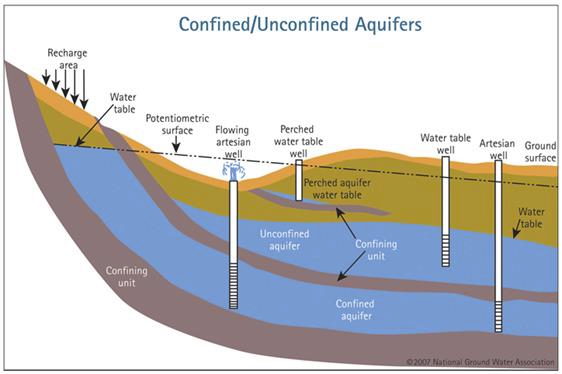

## what are the relevant datasets?

In [3]:
rel_filenames = []
for filename in filenames:
        if "Aquifer" in filename:
            rel_filenames.append(filename)

rel_filenames

['Aquifer_Doganella.csv',
 'Aquifer_Auser.csv',
 'Aquifer_Luco.csv',
 'Aquifer_Petrignano.csv']

Loading the data...

In [4]:
aq_doganelle = pd.read_csv(r"/kaggle/input/acea-water-prediction/Aquifer_Doganella.csv")
aq_auser = pd.read_csv(r"/kaggle/input/acea-water-prediction/Aquifer_Auser.csv")
aq_luco = pd.read_csv(r"/kaggle/input/acea-water-prediction/Aquifer_Luco.csv")
aq_petrignano = pd.read_csv(r"/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv")
gps_coords_aq = pd.read_excel(r"../input/gps-coords-aq/gps_coords.xlsx",dtype={'Latitude': float, 'Longitude':float})

## General information about the datasets concerning Aquifers

### Detailed Information about the datasets:

In [5]:
for name, data in zip(["Doganelle","Auser","Luco","Petrignano"],[aq_doganelle,aq_auser,aq_luco,aq_petrignano]):
    print("Name of the dataset: {}\n".format(name))
    print(data.info())
    print("\n")

Name of the dataset: Doganelle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6026 entries, 0 to 6025
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          6026 non-null   object 
 1   Rainfall_Monteporzio          5399 non-null   float64
 2   Rainfall_Velletri             5374 non-null   float64
 3   Depth_to_Groundwater_Pozzo_1  2537 non-null   float64
 4   Depth_to_Groundwater_Pozzo_2  2736 non-null   float64
 5   Depth_to_Groundwater_Pozzo_3  2774 non-null   float64
 6   Depth_to_Groundwater_Pozzo_4  2374 non-null   float64
 7   Depth_to_Groundwater_Pozzo_5  2508 non-null   float64
 8   Depth_to_Groundwater_Pozzo_6  2428 non-null   float64
 9   Depth_to_Groundwater_Pozzo_7  2311 non-null   float64
 10  Depth_to_Groundwater_Pozzo_8  2551 non-null   float64
 11  Depth_to_Groundwater_Pozzo_9  2339 non-null   float64
 12  Volume_Pozzo_1                

### To have broader, quicker idea about the features included in the dataset:

In [6]:
def get_cat(row_element):
    
    return_val = "other"
    
    for keyword in keywords:
        if keyword in row_element:
            return_val = keyword
    return return_val

col_df = pd.DataFrame(columns=["Dataset","cols"])
keywords = ["Rainfall","Depth","Volume","Temperature","Date","Hydrometry"]   

for name, data in zip(["Doganelle","Auser","Luco","Petrignano"],[aq_doganelle,aq_auser,aq_luco,aq_petrignano]):

    buffer_df = pd.DataFrame({"Dataset":list([name]*data.shape[1]),"cols":data.columns})
    col_df = pd.concat([col_df,buffer_df],axis=0)

col_df.reset_index(drop=True, inplace=True)
col_df["col_category"] = col_df["cols"].apply(lambda x: get_cat(x))

pd.crosstab(index = col_df["Dataset"], columns = col_df["col_category"],margins =True)

col_category  Date  Depth  Hydrometry  Rainfall  Temperature  Volume  All
Dataset                                                                  
Auser            1      5           2        10            4       5   27
Doganelle        1      9           0         2            2       8   22
Luco             1      4           0        10            4       3   22
Petrignano       1      2           1         1            2       1    8
All              4     20           3        23           12      17   79

### the dataset is a timeseries. So in which timeframe is the data situated ?

In [7]:
aq_doganelle["Date"] = pd.to_datetime(aq_doganelle["Date"],format="%d/%m/%Y")
aq_auser["Date"] = pd.to_datetime(aq_auser["Date"],format="%d/%m/%Y")
aq_luco["Date"] = pd.to_datetime(aq_luco["Date"],format="%d/%m/%Y")
aq_petrignano["Date"] = pd.to_datetime(aq_petrignano["Date"],format="%d/%m/%Y")

aq_doganelle.set_index("Date",inplace=True)
aq_auser.set_index("Date",inplace=True)
aq_luco.set_index("Date",inplace=True)
aq_petrignano.set_index("Date",inplace=True)

In [8]:
for name, data in zip(["Doganelle","Auser","Luco","Petrignano"],[aq_doganelle,aq_auser,aq_luco,aq_petrignano]):
    print("Time of the dataset: {}\n".format(name))
    print("From: {}".format(np.min(data.index)))
    print("From: {}".format(np.max(data.index)))
    print("Frequency: {}".format(data.index[1]-data.index[0]))
    print("\n")

Time of the dataset: Doganelle

From: 2004-01-01 00:00:00
From: 2020-06-30 00:00:00
Frequency: 1 days 00:00:00


Time of the dataset: Auser

From: 1998-03-05 00:00:00
From: 2020-06-30 00:00:00
Frequency: 1 days 00:00:00


Time of the dataset: Luco

From: 2000-01-01 00:00:00
From: 2020-06-30 00:00:00
Frequency: 1 days 00:00:00


Time of the dataset: Petrignano

From: 2006-03-14 00:00:00
From: 2020-06-30 00:00:00
Frequency: 1 days 00:00:00




* The datasets are from different time frames 
* but the end the same date

### From which regions and from which places does the data come from and what do we know about the data?

In [9]:
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (43.41,13.3), zoom_start=7).add_to(f)
for index, row in gps_coords_aq.iterrows():
    if row["Dataset"] == "Doganelle":
        folium.Marker([row["Latitude"], row["Longitude"]], icon=folium.Icon(color="blue"),popup=str(row["location"])).add_to(mapa)
    elif row["Dataset"] == "Auser":
        folium.Marker([row["Latitude"], row["Longitude"]], icon=folium.Icon(color="red"),popup=str(row["location"])).add_to(mapa)
    elif row["Dataset"] == "Luco":
        folium.Marker([row["Latitude"], row["Longitude"]], icon=folium.Icon(color="black"),popup=str(row["location"])).add_to(mapa)
    else:
        folium.Marker([row["Latitude"], row["Longitude"]], icon=folium.Icon(color="orange"),popup=str(row["location"])).add_to(mapa)
    
display(mapa)

Color Coding: 

* blue: Dataset Doganelle
* red: Dataset Auser
* black: Dataset Luco
* orange: Dataset Petrignano 

Further description:

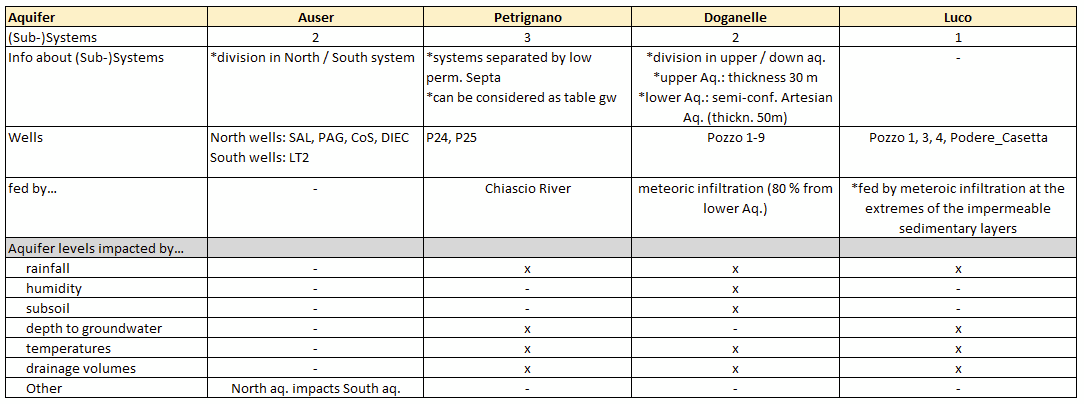

### How many missing values are in the datasets?

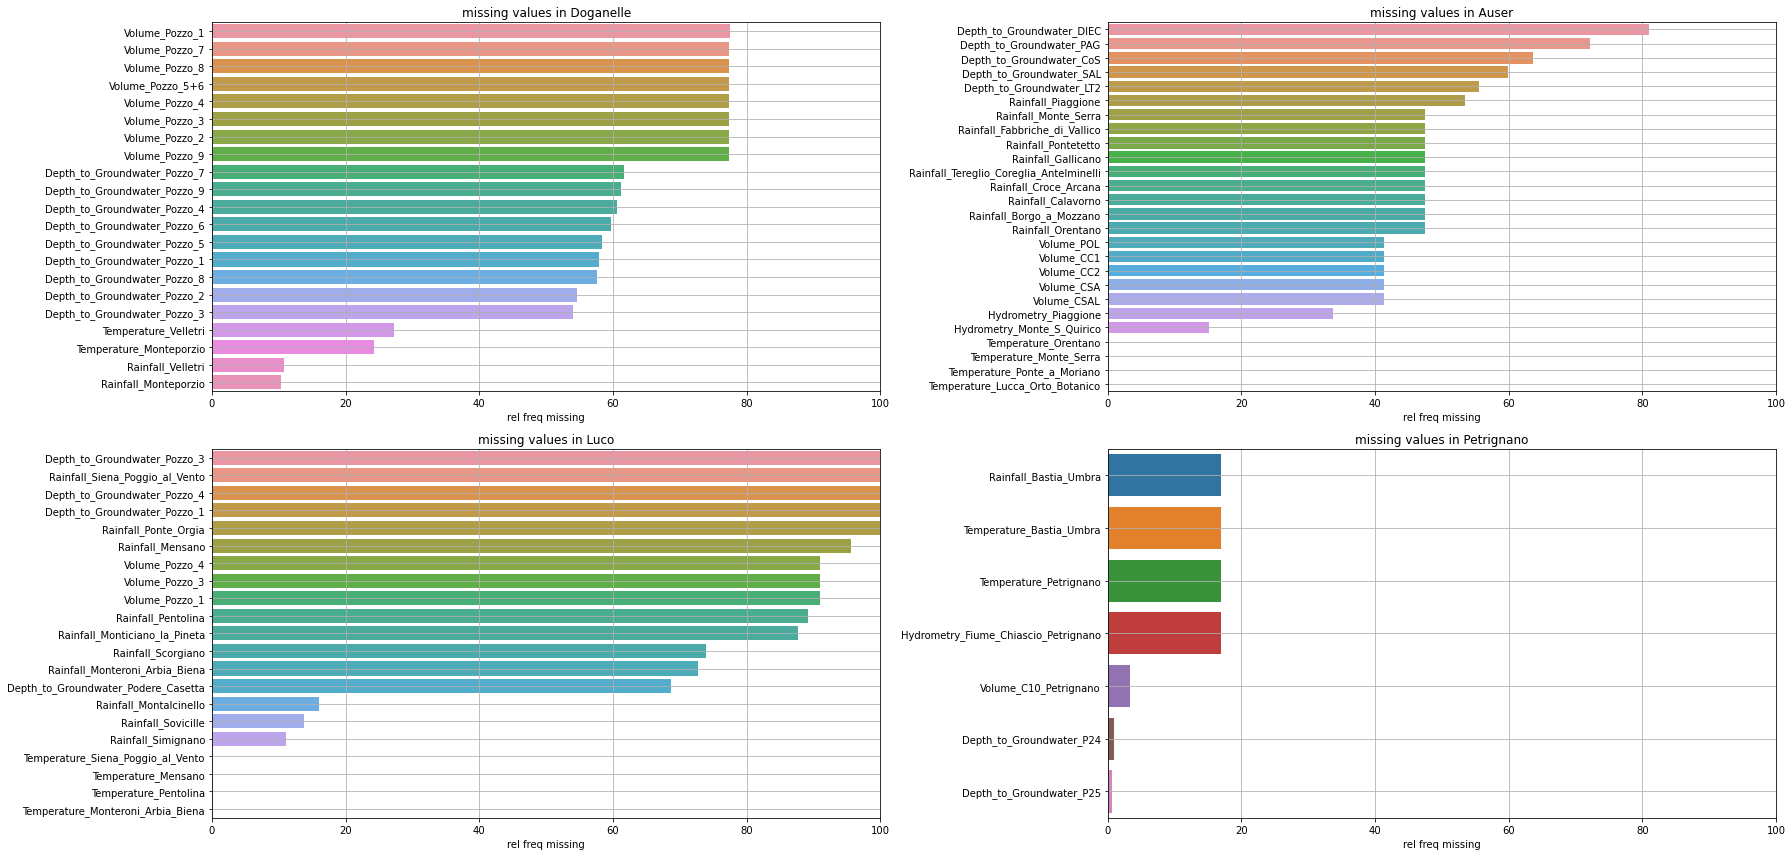

In [10]:
missing_aq_doganelle = pd.DataFrame({"abs freq missing":aq_doganelle.isnull().sum(),"rel freq missing":aq_doganelle.isnull().sum()/aq_doganelle.shape[0]*100}).sort_values(by="rel freq missing",ascending=False)
missing_aq_Auser = pd.DataFrame({"abs freq missing":aq_auser.isnull().sum(),"rel freq missing":aq_auser.isnull().sum()/aq_doganelle.shape[0]*100}).sort_values(by="rel freq missing",ascending=False)
missing_aq_luco = pd.DataFrame({"abs freq missing":aq_luco.isnull().sum(),"rel freq missing":aq_luco.isnull().sum()/aq_doganelle.shape[0]*100}).sort_values(by="rel freq missing",ascending=False)
missing_aq_petrignano = pd.DataFrame({"abs freq missing":aq_petrignano.isnull().sum(),"rel freq missing":aq_petrignano.isnull().sum()/aq_doganelle.shape[0]*100}).sort_values(by="rel freq missing",ascending=False)

fig,sub = plt.subplots(2,2,figsize=(25,12))
for name, data, subplot in zip(["Doganelle","Auser","Luco","Petrignano"],[missing_aq_doganelle,missing_aq_Auser,missing_aq_luco,missing_aq_petrignano],sub.flatten()):
    sns.barplot(x=data["rel freq missing"],y=data.index,ax=subplot, orient ="h")
    subplot.set_title("missing values in {}".format(name))
    subplot.set_xlim([0,100])
    subplot.grid()
fig.tight_layout()

* it is quite compelling that most (> 60 %) of the target features ('depth to groundwater') are missing in the datasets
* only in the dataset Petrignano has an acceptable rate of missing values
* Question to keep in mind: Why are so many values missing and is there maybe an mechanism causing the missingness

By Visualizing the missingness in the data is it possible to detect some possible pattern in the data? The darker the more values are missing for the concerning year

In [11]:
def get_missing_heatmap_vals(df,missing_df):
    years_missing_vals = pd.DataFrame(index = df.index.year.unique())

    for feat in missing_df.index:
        years_missing_vals[feat] = df[feat].isnull().groupby(df.index.year).sum()
    return years_missing_vals

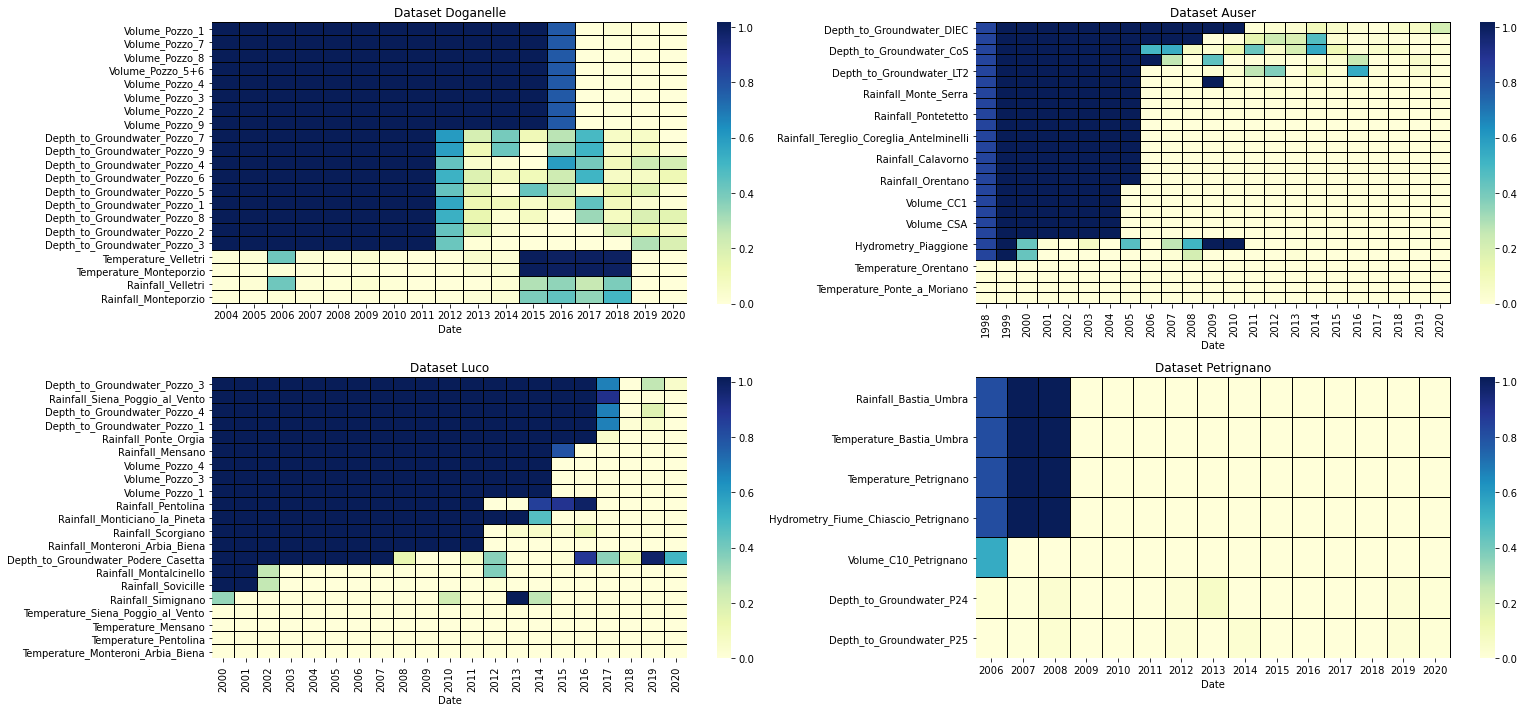

In [12]:
fig,sub = plt.subplots(2,2,figsize=(22,10))

for name,df, missing_df,subplot in zip(["Dataset Doganelle","Dataset Auser","Dataset Luco","Dataset Petrignano"],[aq_doganelle,aq_auser,aq_luco,aq_petrignano],[missing_aq_doganelle,missing_aq_Auser,missing_aq_luco,missing_aq_petrignano],sub.flatten()):
    heatmap_data = get_missing_heatmap_vals(df,missing_df)
    sns.heatmap(heatmap_data.T/360, linecolor = "black",lw=0.01,cmap="YlGnBu",ax=subplot,annot = False)
    subplot.set_title("{}".format(name))
fig.tight_layout()

* As we can see in the visualizations not all features in the dataset are available for the integral timeframe       

### another good way to make sense of the data is to plot it against time:

* Dataset Doganelle:

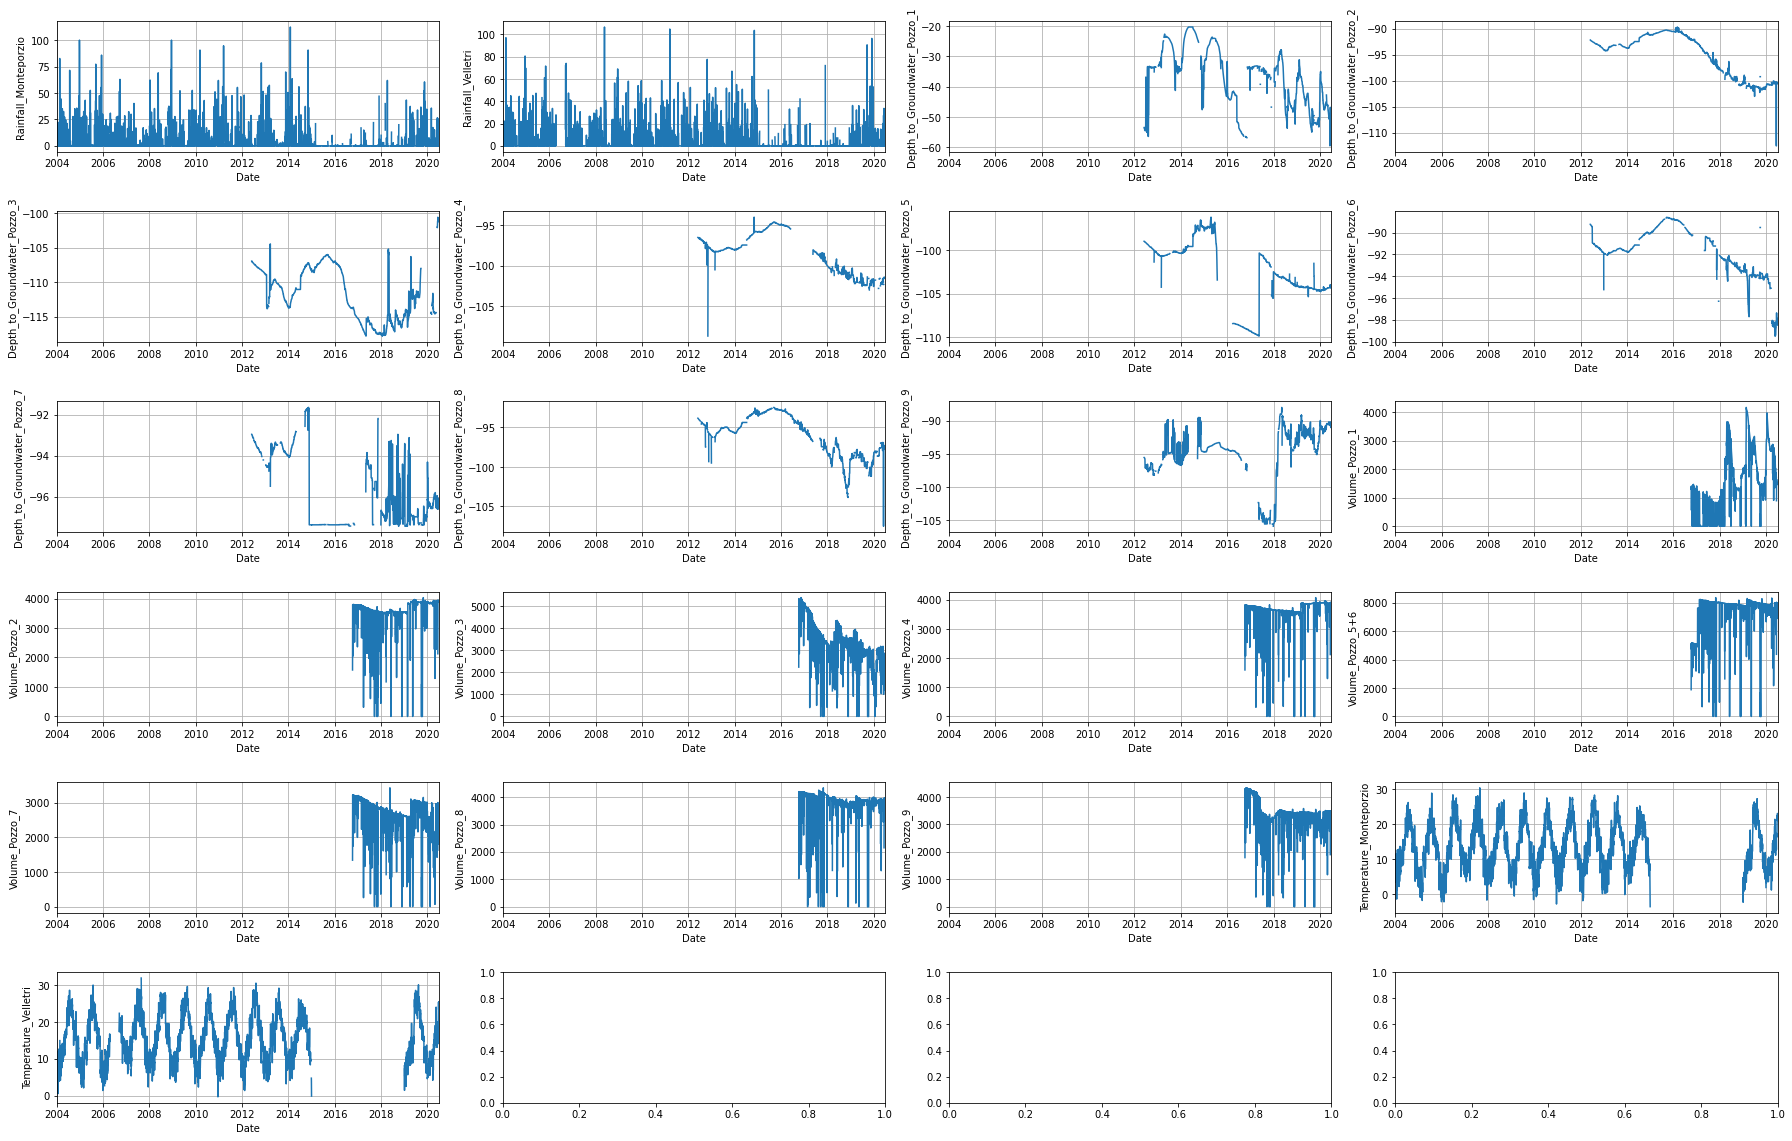

In [42]:
fig,sub= plt.subplots(6,4,figsize=(25,16))

for col, subplot in zip(aq_doganelle.columns, sub.flatten()):
    sns.lineplot(x=aq_doganelle[col].index,y=aq_doganelle[col].fillna(np.inf), ax=subplot)
    subplot.set_xlim([pd.to_datetime("2004-01-01"),pd.to_datetime("2020-06-30")])
    subplot.grid()
fig.tight_layout()

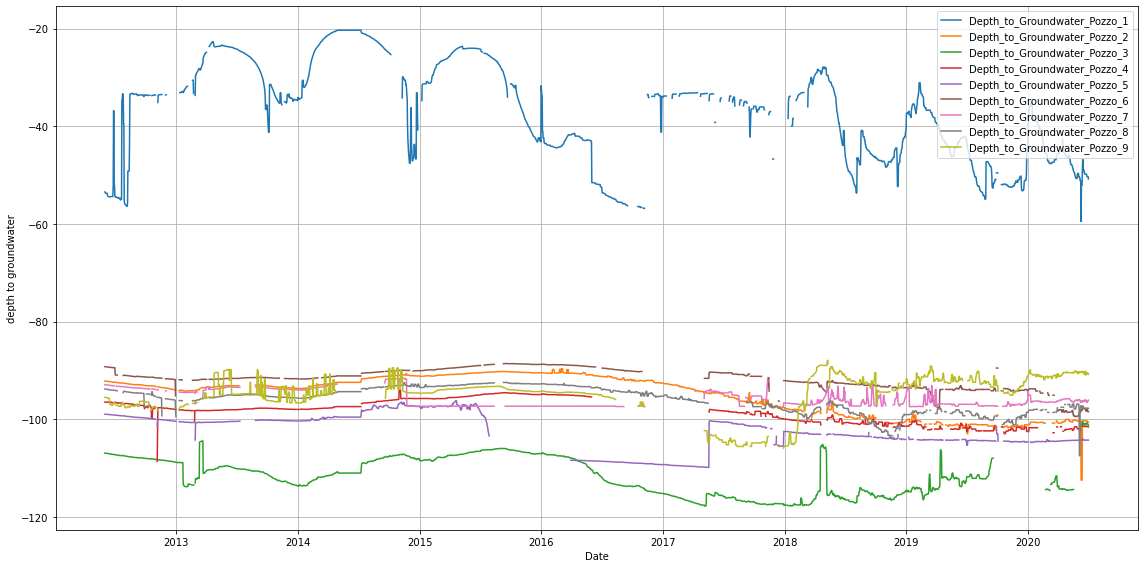

In [45]:
fig,sub= plt.subplots(1,1,figsize=(16,8))

for col in aq_doganelle.columns[aq_doganelle.columns.str.contains("Depth")]:

    sns.lineplot(x=aq_doganelle[col].index,y=aq_doganelle[col].fillna(np.inf), ax=sub, label=col)
    sub.grid()
    sub.legend(loc="upper right")
    sub.set_ylabel("depth to groundwater")
fig.tight_layout()

* Dataset Auser

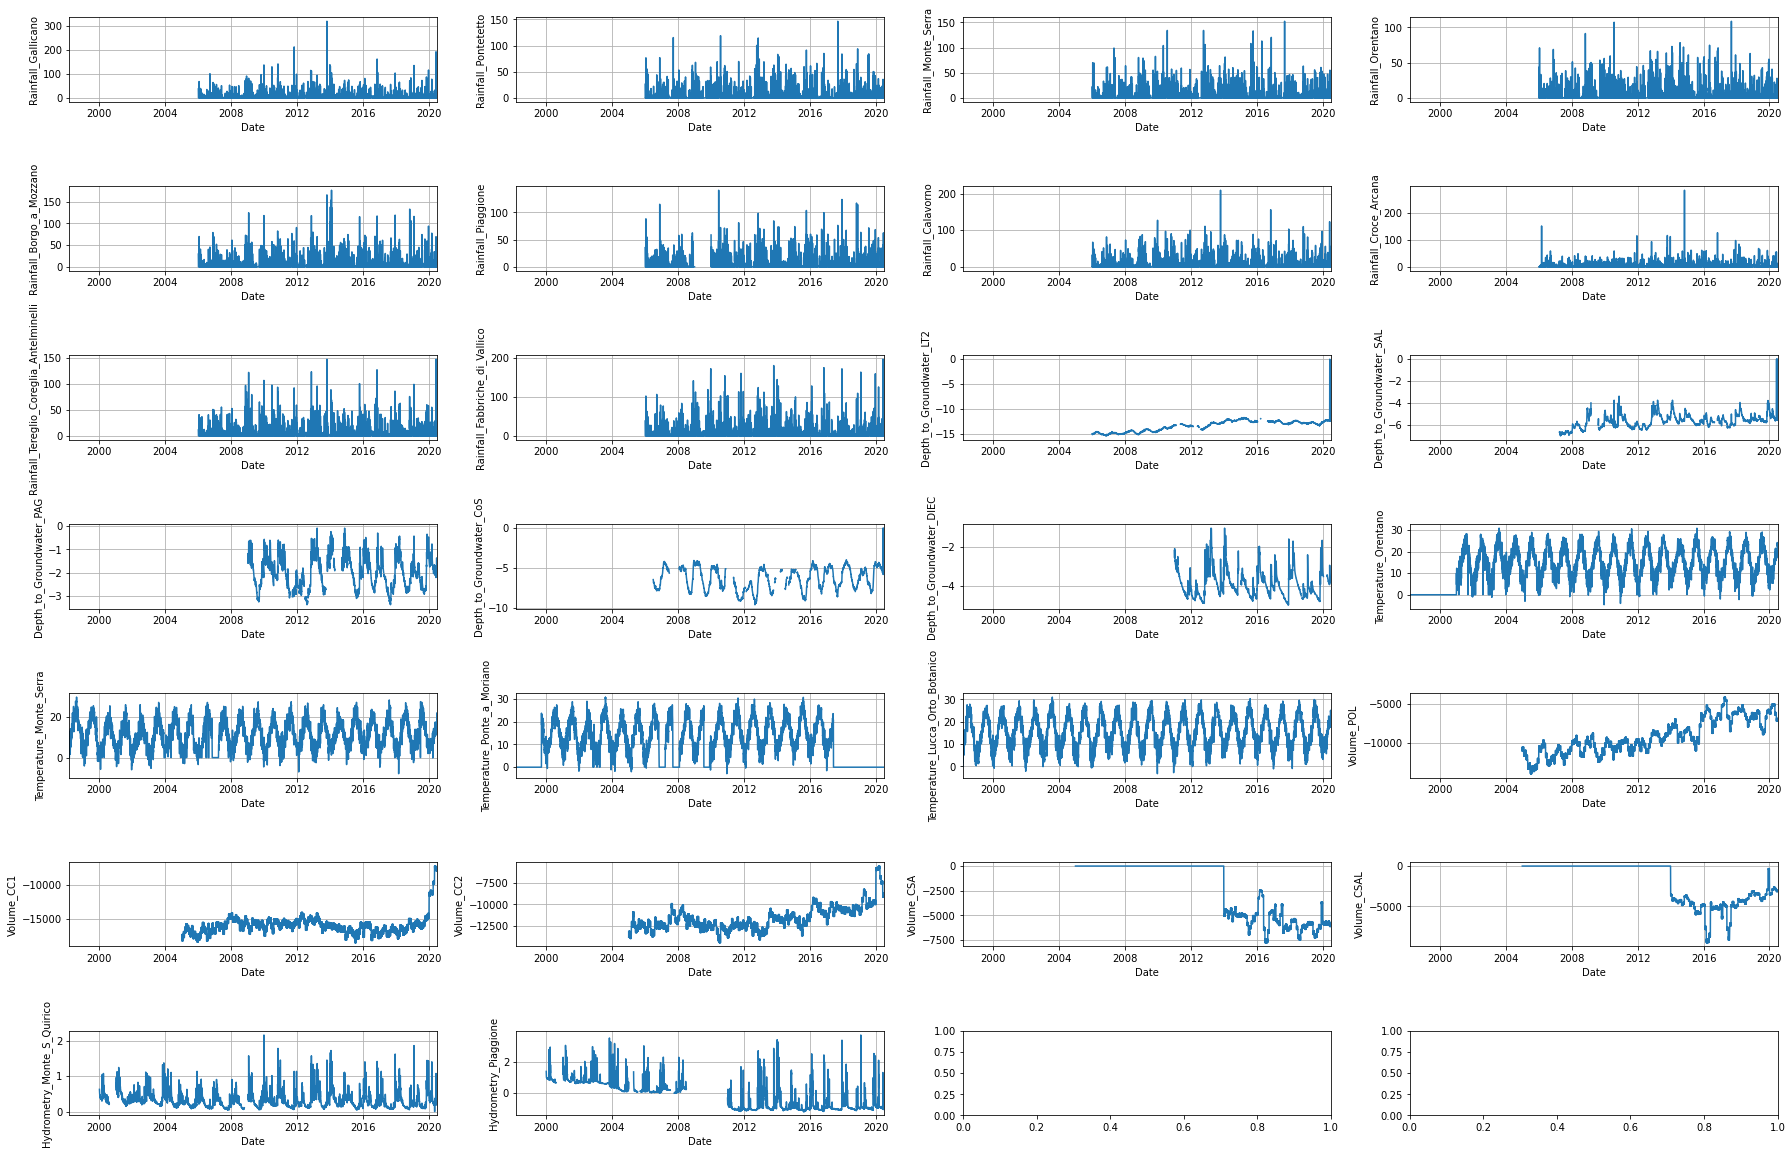

In [43]:
fig,sub= plt.subplots(7,4,figsize=(25,16))

for col, subplot in zip(aq_auser.columns, sub.flatten()):
    sns.lineplot(x=aq_auser[col].index,y=aq_auser[col].fillna(np.inf), ax=subplot)
    subplot.set_xlim([pd.to_datetime("1998-03-05"),pd.to_datetime("2020-06-30")])
    subplot.grid()
fig.tight_layout()

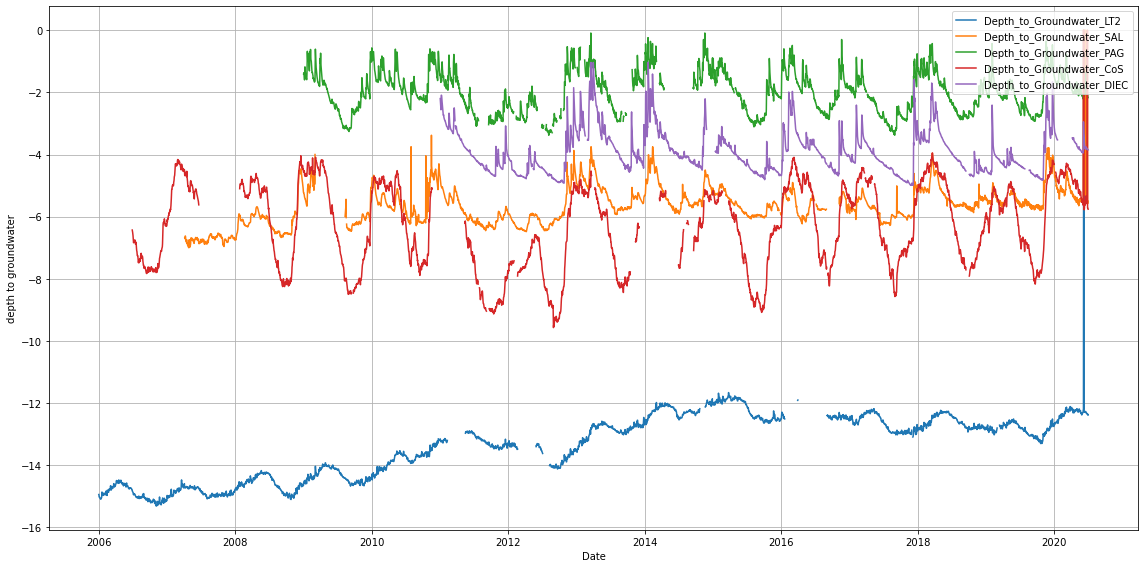

In [46]:
fig,sub= plt.subplots(1,1,figsize=(16,8))

for col in aq_auser.columns[aq_auser.columns.str.contains("Depth")]:

    sns.lineplot(x=aq_auser[col].index,y=aq_auser[col].fillna(np.inf), ax=sub, label=col)
    sub.grid()
    sub.legend(loc="upper right")
    sub.set_ylabel("depth to groundwater")
fig.tight_layout()

Dataset Luco

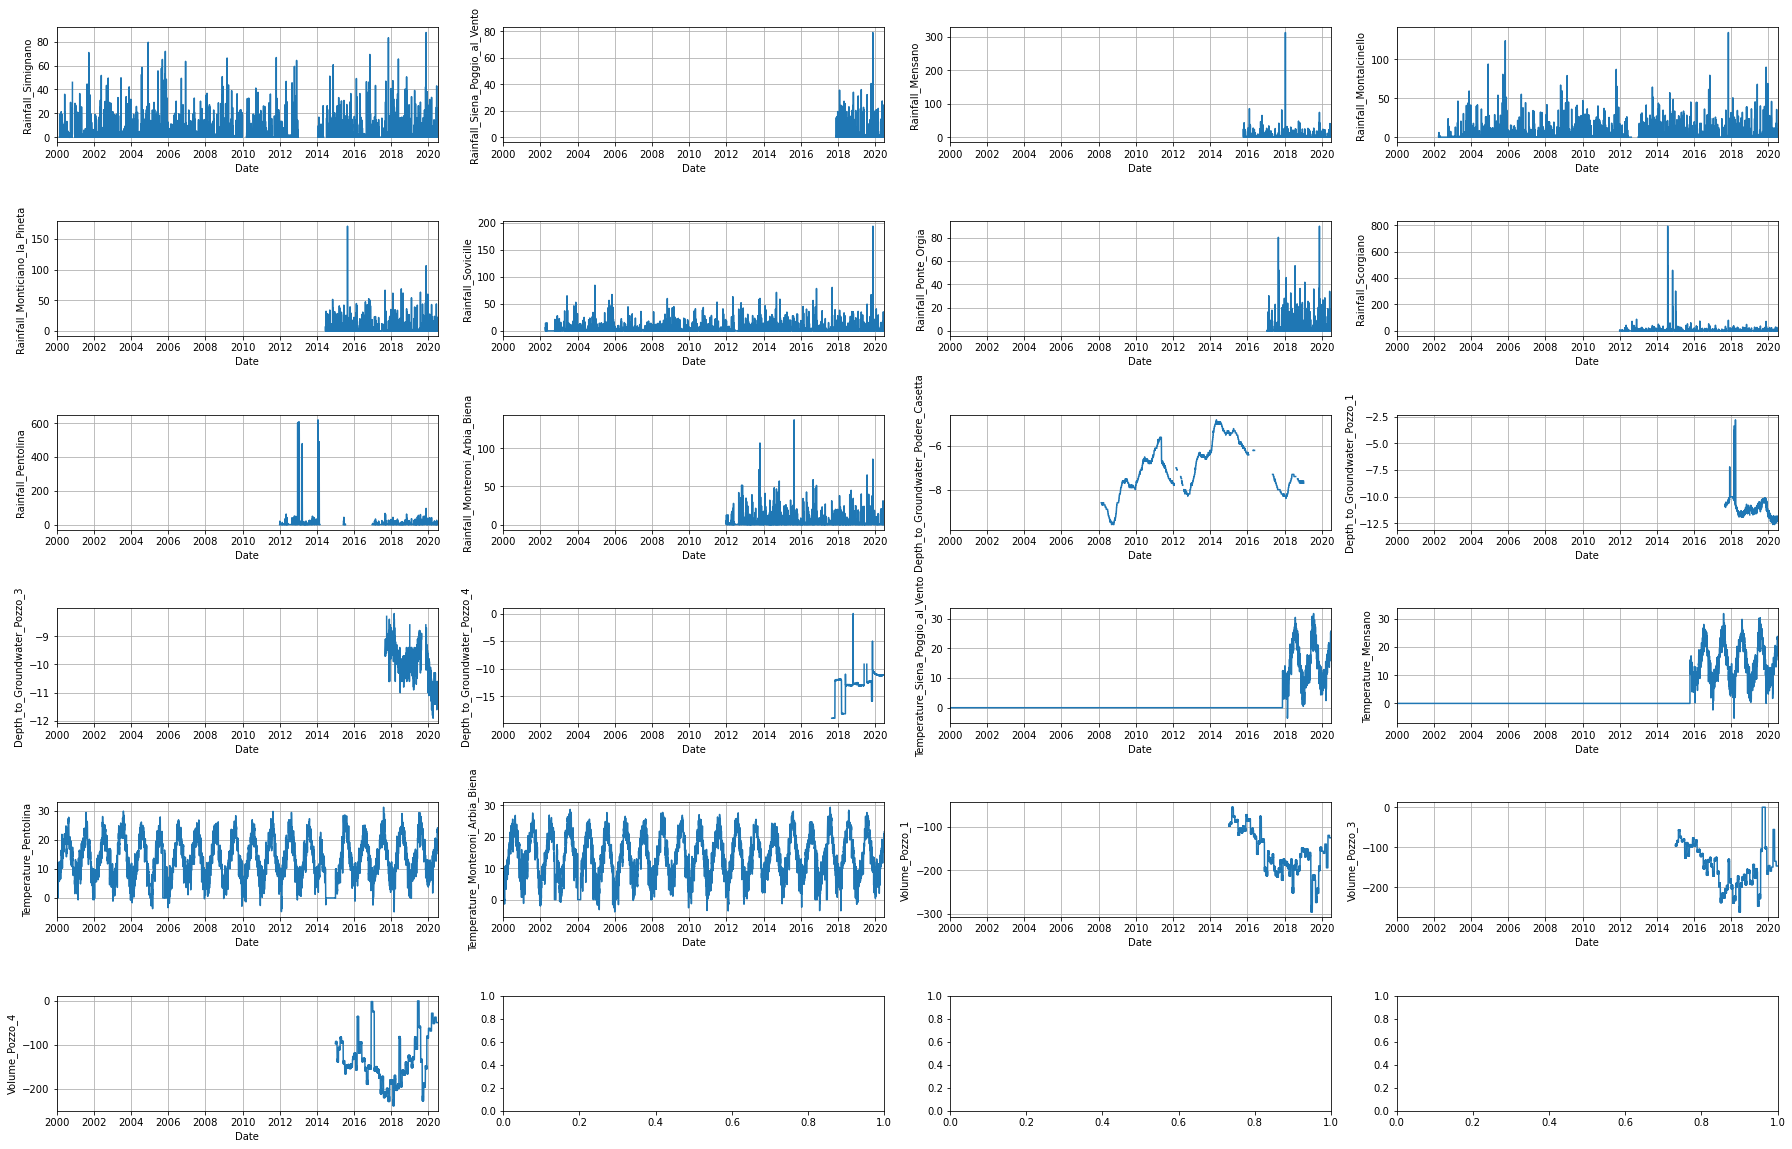

In [44]:
fig,sub= plt.subplots(6,4,figsize=(25,16))

for col, subplot in zip(aq_luco.columns, sub.flatten()):
    sns.lineplot(x=aq_luco[col].index,y=aq_luco[col].fillna(np.inf), ax=subplot)
    subplot.set_xlim([pd.to_datetime("2000-01-01"),pd.to_datetime("2020-06-30")])
    subplot.grid()
fig.tight_layout()

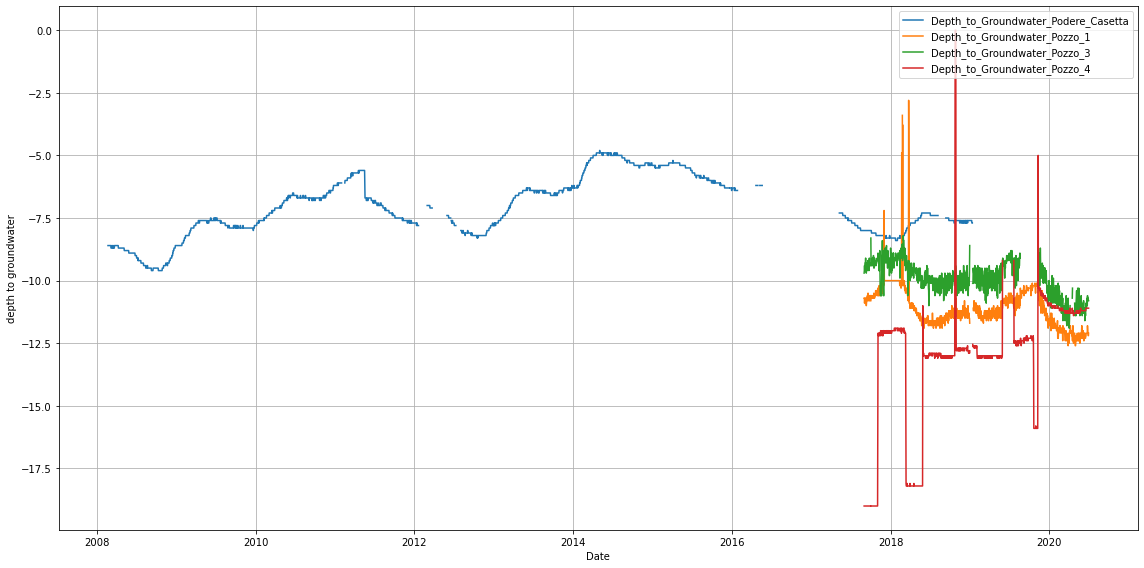

In [47]:
fig,sub= plt.subplots(1,1,figsize=(16,8))

for col in aq_luco.columns[aq_luco.columns.str.contains("Depth")]:

    sns.lineplot(x=aq_luco[col].index,y=aq_luco[col].fillna(np.inf), ax=sub, label=col)
    sub.set_ylabel("depth to groundwater")
    sub.legend(loc="upper right")
fig.tight_layout()
sub.grid()

Dataset Petrignano

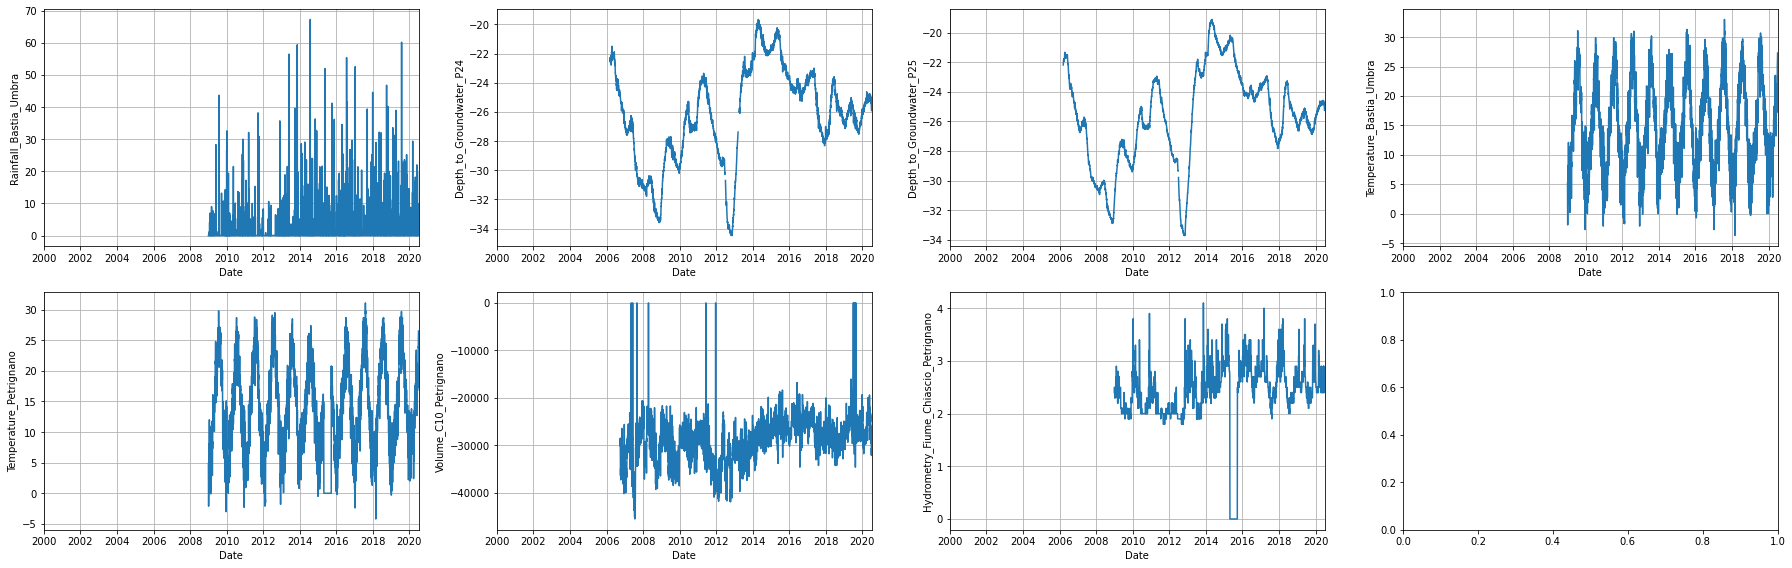

In [48]:
fig,sub= plt.subplots(2,4,figsize=(25,8))

for col, subplot in zip(aq_petrignano.columns, sub.flatten()):
    sns.lineplot(x=aq_petrignano[col].index,y=aq_petrignano[col].fillna(np.inf), ax=subplot)
    subplot.set_xlim([pd.to_datetime("2000-01-01"),pd.to_datetime("2020-06-30")])
    subplot.grid()
fig.tight_layout()

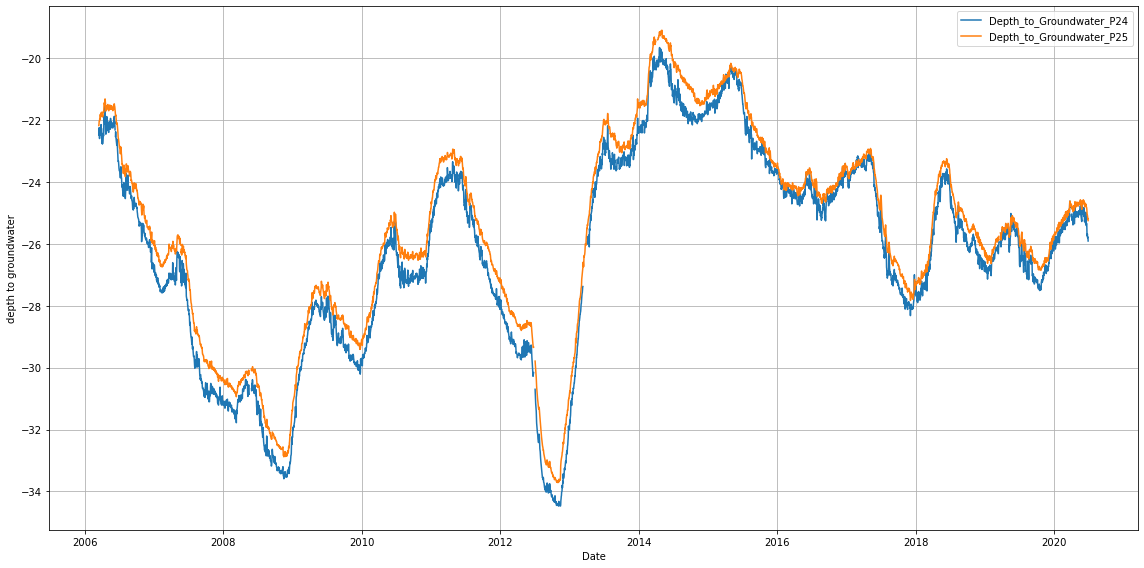

In [49]:
fig,sub= plt.subplots(1,1,figsize=(16,8))

for col in aq_petrignano.columns[aq_petrignano.columns.str.contains("Depth")]:

    sns.lineplot(x=aq_petrignano[col].index,y=aq_petrignano[col].fillna(np.inf), ax=sub, label=col)
    sub.set_ylabel("depth to groundwater")
    sub.legend(loc="upper right")
fig.tight_layout()
sub.grid()

#### Correlation between the targets

In [21]:
from itertools import combinations 
    
def draw_scatterplots(df,target):
    comb = combinations(df.columns[df.columns.str.contains(target)],2)
    num_of_rows = len([element1 for element1,element2 in comb])
    
    comb = combinations(df.columns[df.columns.str.contains(target)],2)

    fig,sub = plt.subplots(int(num_of_rows/4+1),4,figsize=(20,4*(int(num_of_rows/4)+1)))

    for (feat_1,feat_2),subplots in zip(comb,sub.flatten()):
        sns.scatterplot(x=df[feat_1],y=df[feat_2],ax=subplots)
        subplots.grid()
    fig.tight_layout()

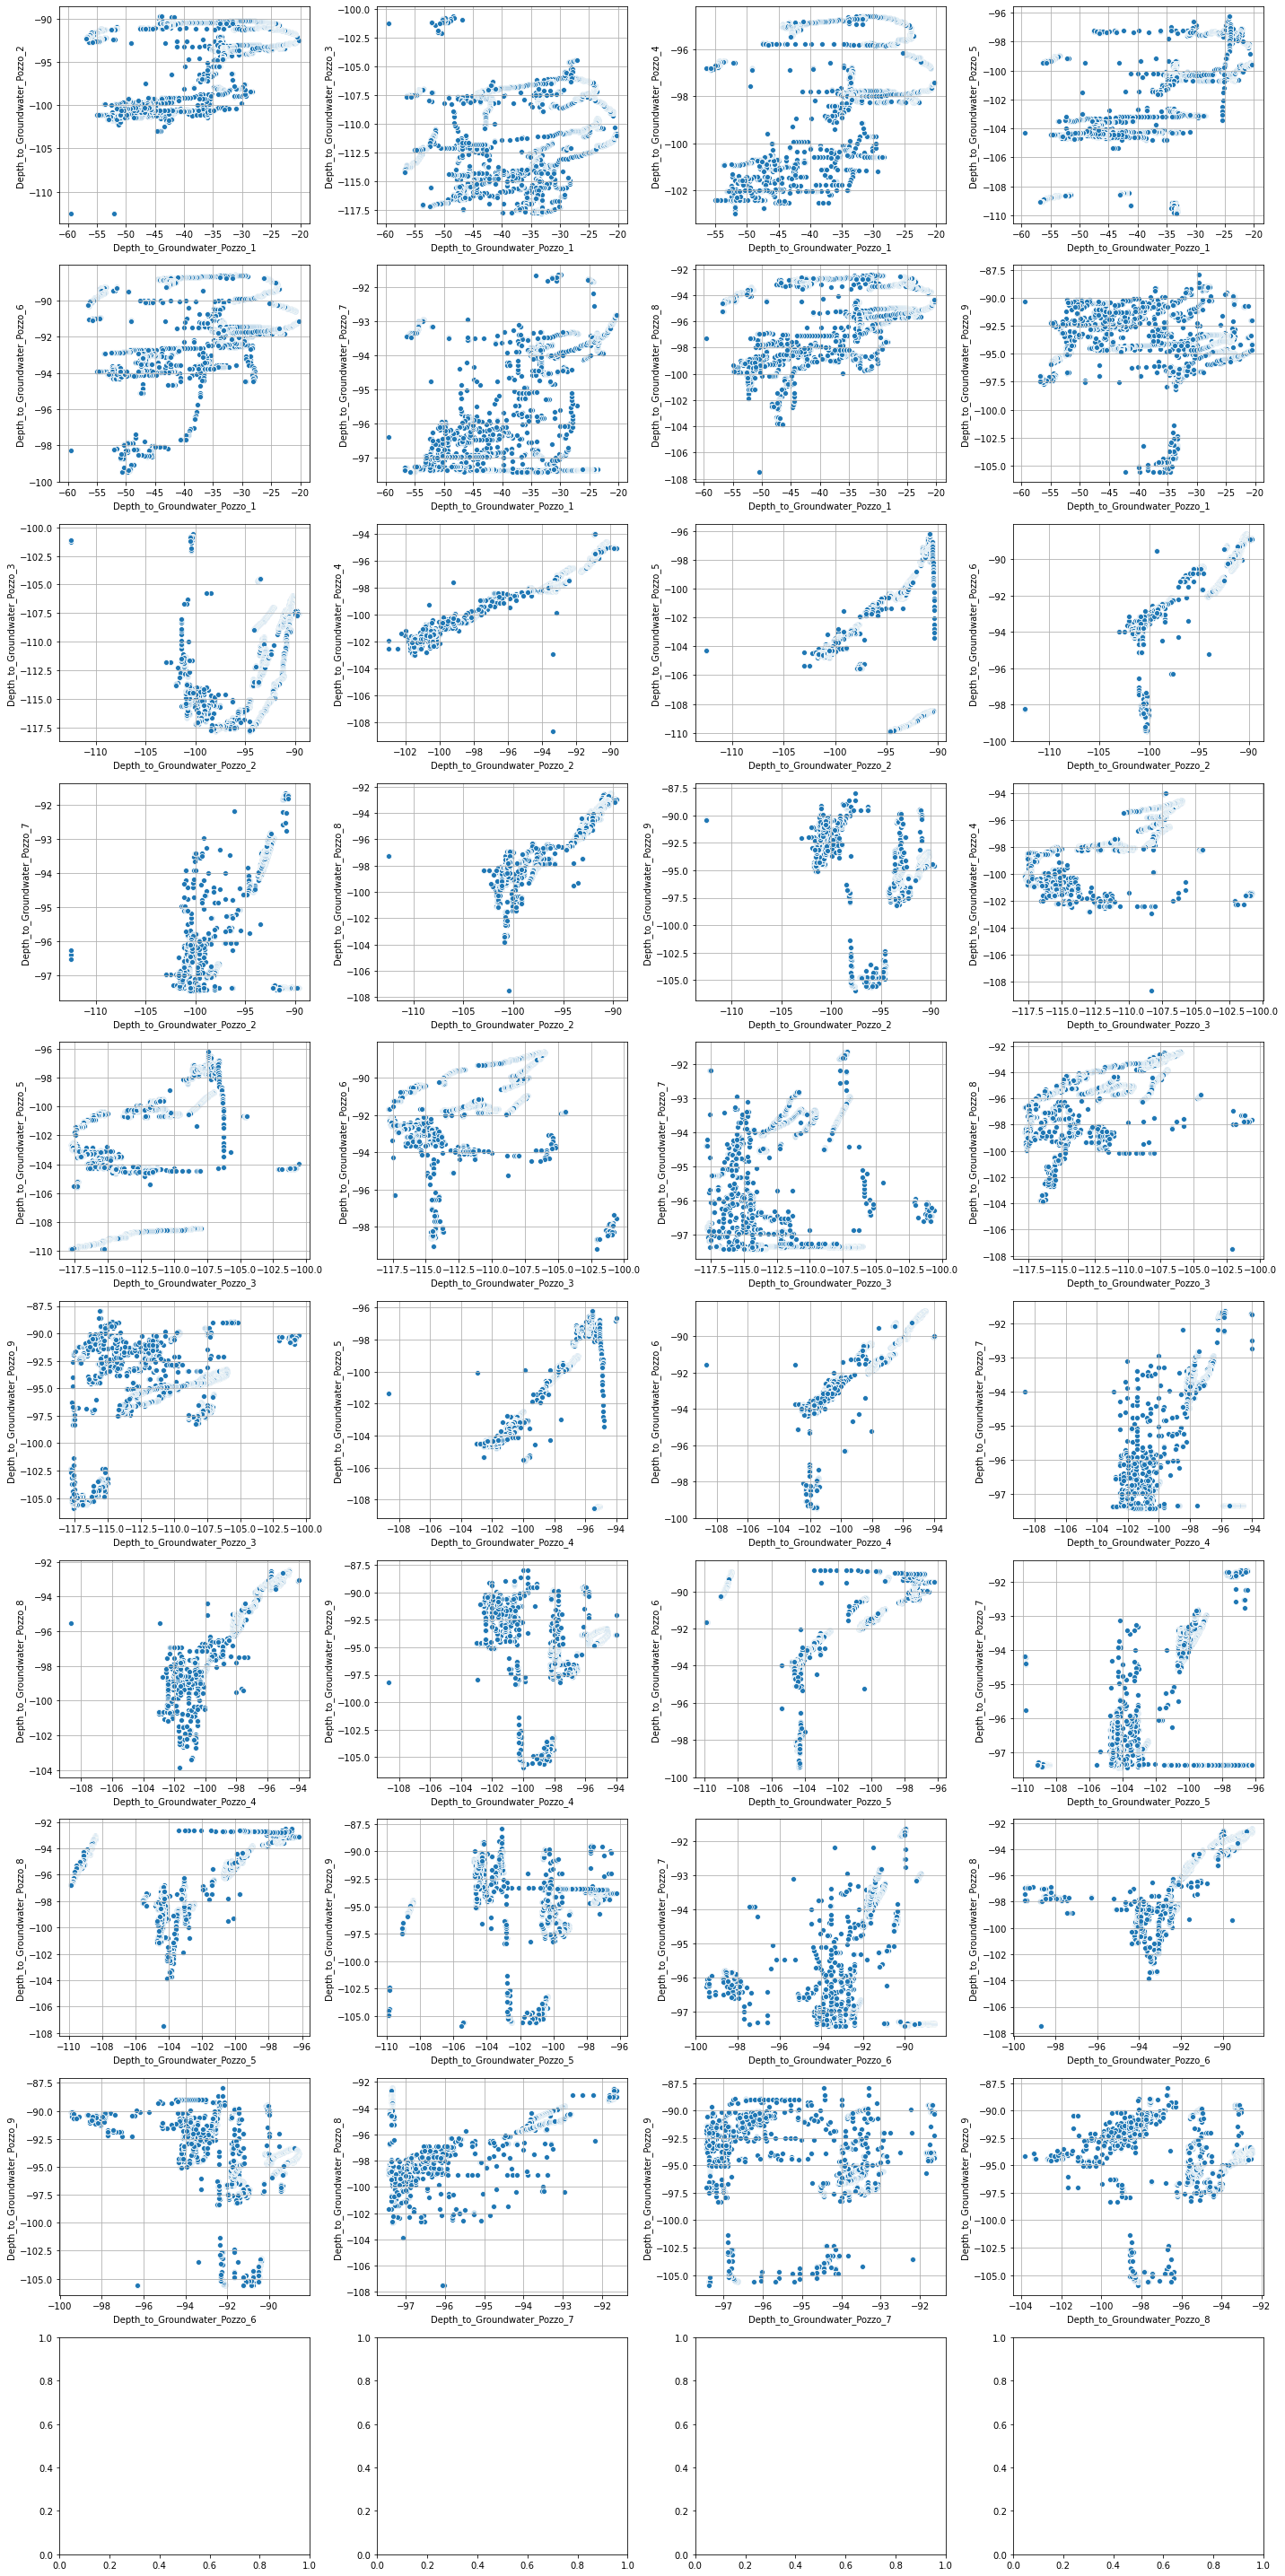

In [22]:
draw_scatterplots(aq_doganelle,"Depth")

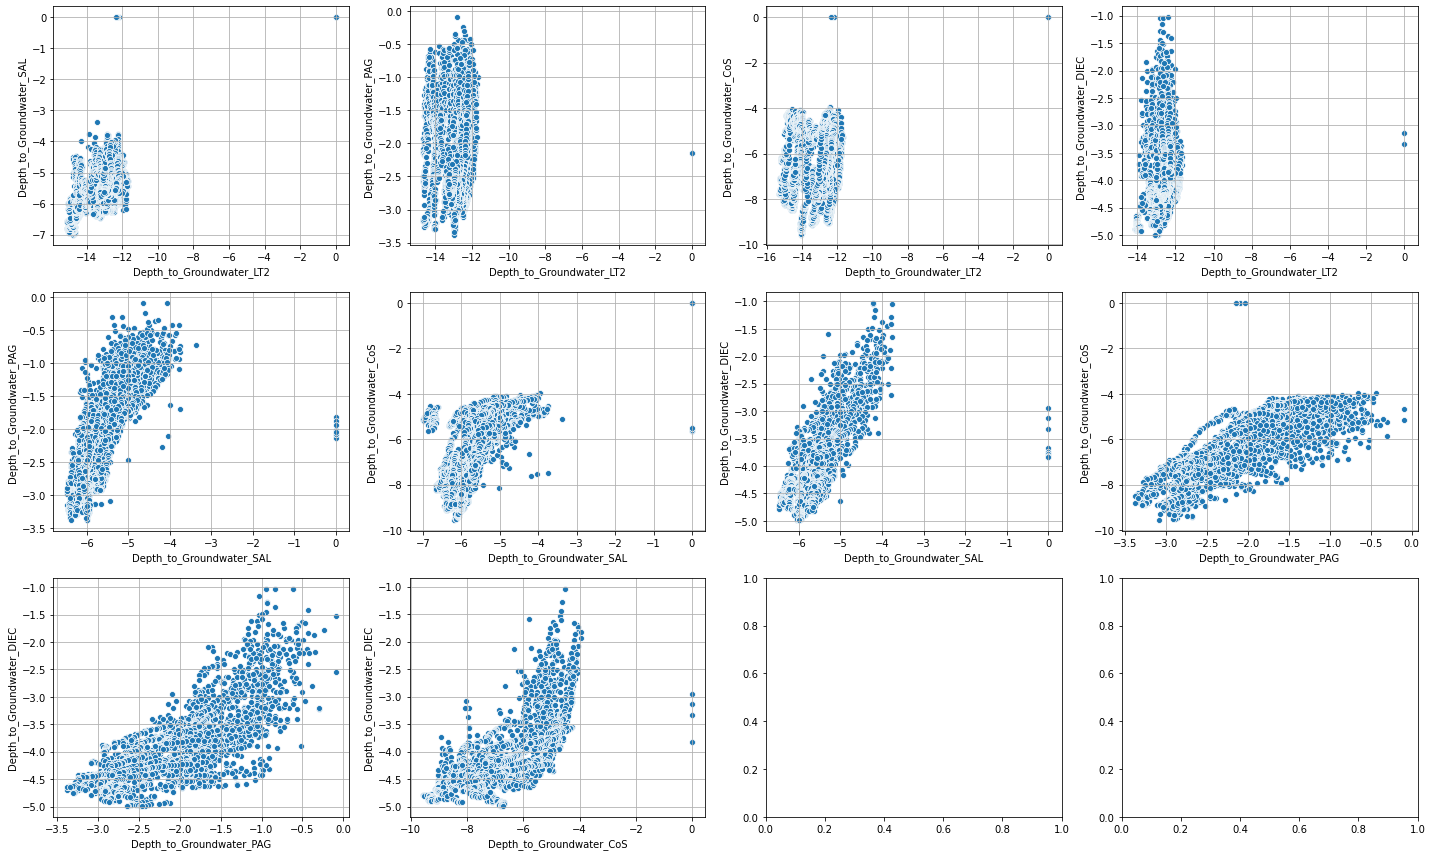

In [23]:
draw_scatterplots(aq_auser,"Depth")

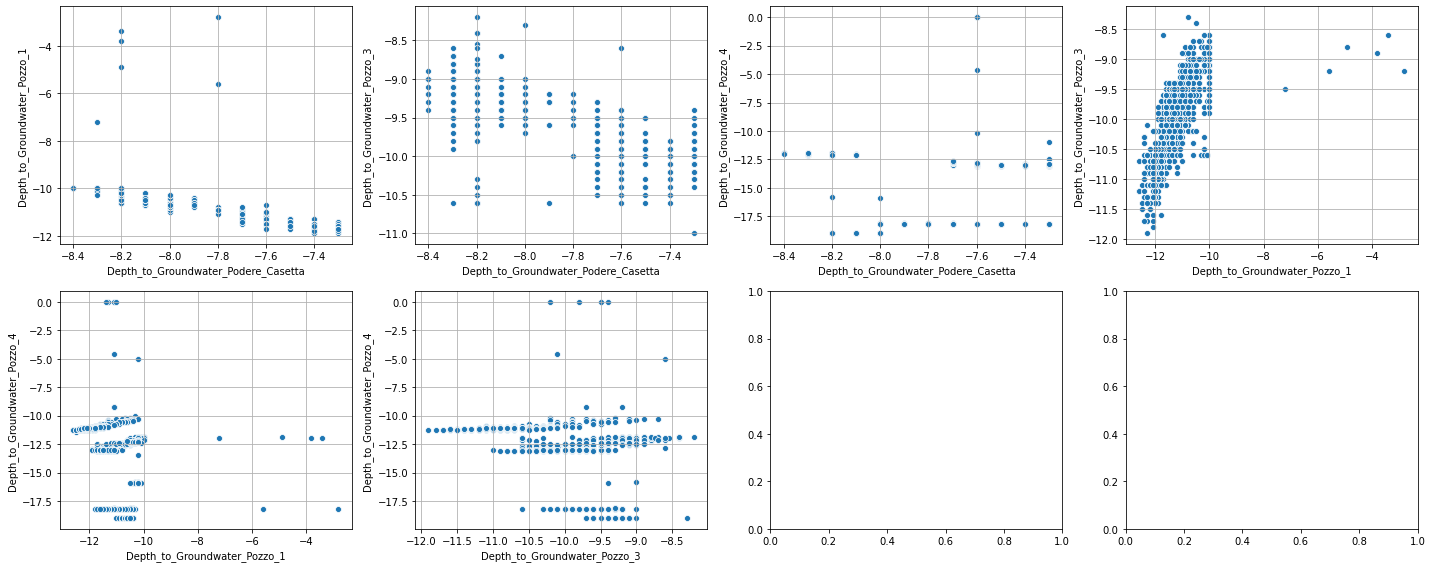

In [24]:
draw_scatterplots(aq_luco,"Depth")

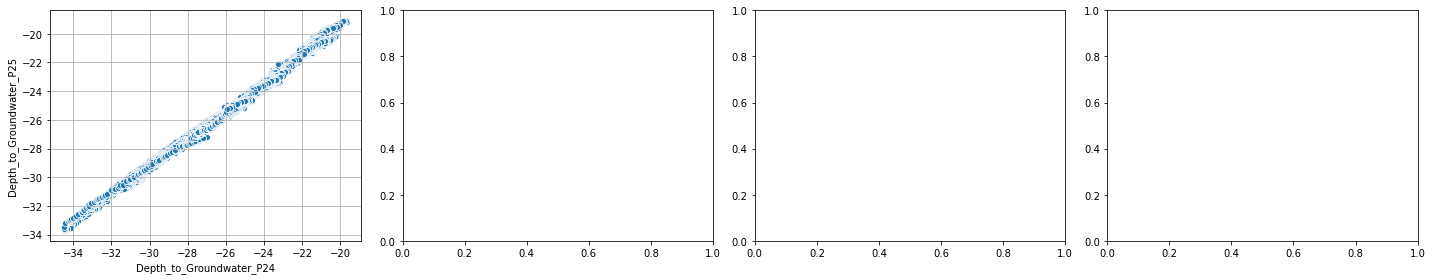

In [25]:
draw_scatterplots(aq_petrignano,"Depth")

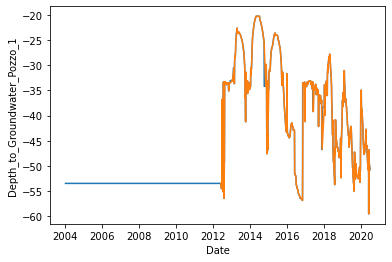

In [30]:
sns.lineplot(x=aq_doganelle["Depth_to_Groundwater_Pozzo_1"].bfill().index,y=aq_doganelle["Depth_to_Groundwater_Pozzo_1"].bfill())
sns.lineplot(x=aq_doganelle["Depth_to_Groundwater_Pozzo_1"].index,y=aq_doganelle["Depth_to_Groundwater_Pozzo_1"])

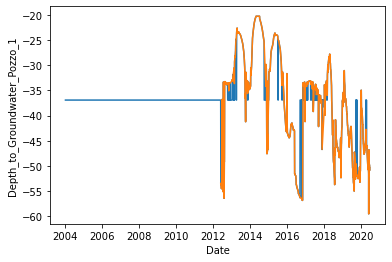

In [36]:
mean = aq_doganelle["Depth_to_Groundwater_Pozzo_1"].mean()
sns.lineplot(x=aq_doganelle["Depth_to_Groundwater_Pozzo_1"].index,y=aq_doganelle["Depth_to_Groundwater_Pozzo_1"].fillna(mean))
sns.lineplot(x=aq_doganelle["Depth_to_Groundwater_Pozzo_1"].index,y=aq_doganelle["Depth_to_Groundwater_Pozzo_1"])

In [34]:
aq_doganelle["Depth_to_Groundwater_Pozzo_1"].mean()

-36.929136775719535